In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv("/walmart-sales-dataset-of-45stores.csv")
df.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

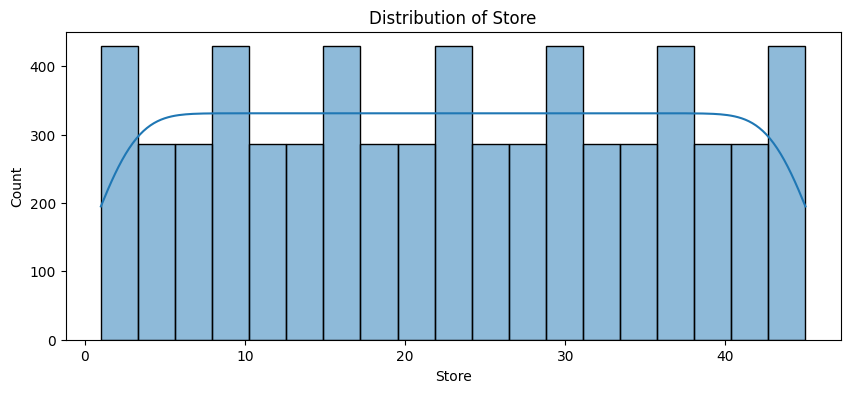

 
Skewness of Store: 0.0


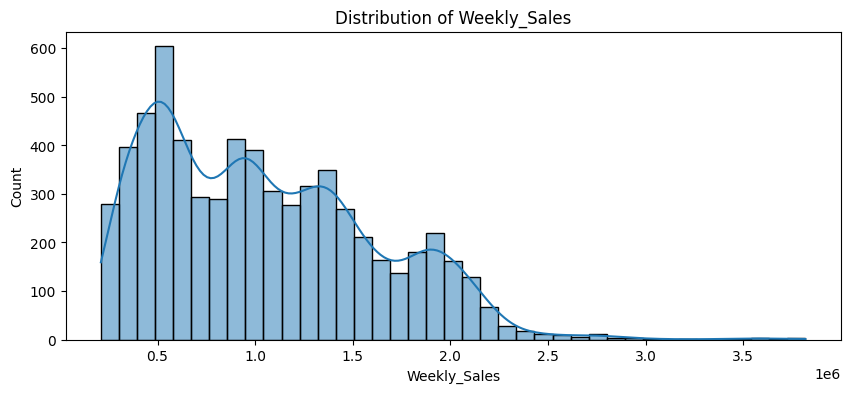

 
Skewness of Weekly_Sales: 0.6683617974864524


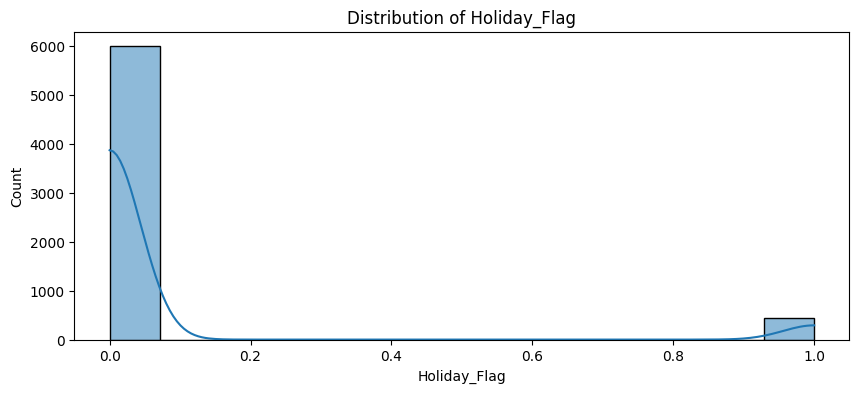

 
Skewness of Holiday_Flag: 3.3734986714578485


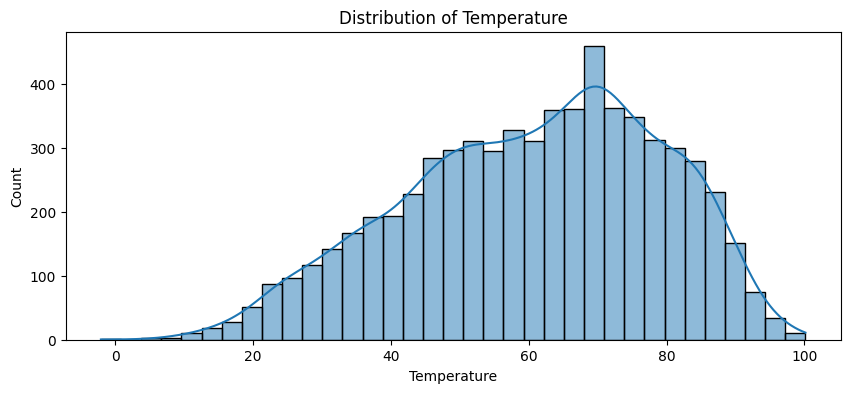

 
Skewness of Temperature: -0.3367676011075799


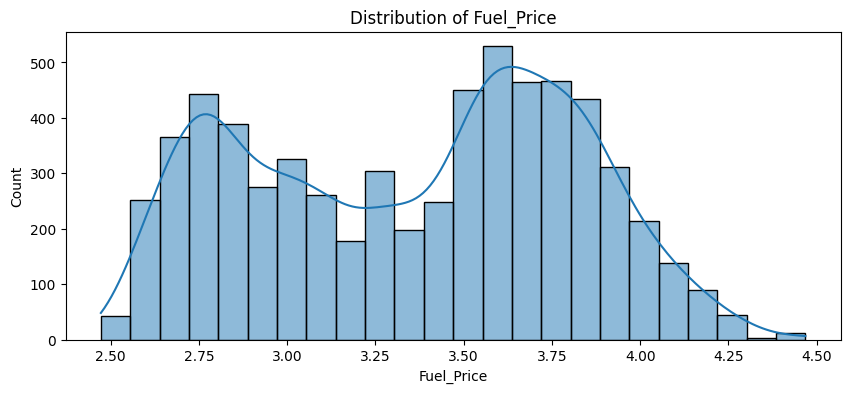

 
Skewness of Fuel_Price: -0.09615830011865549


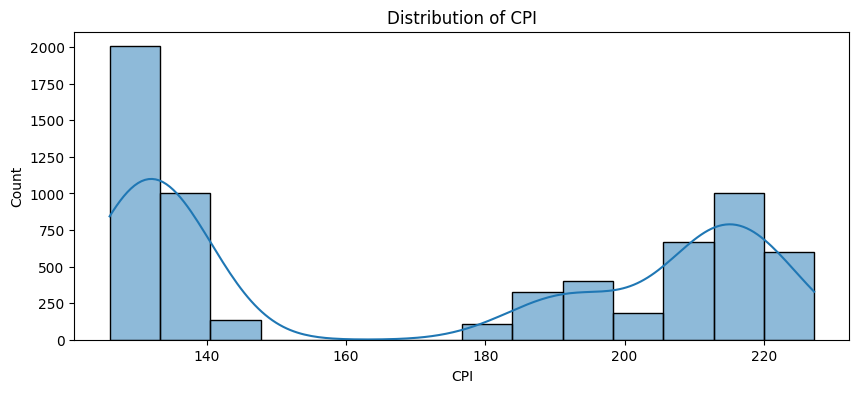

 
Skewness of CPI: 0.06349184988549494


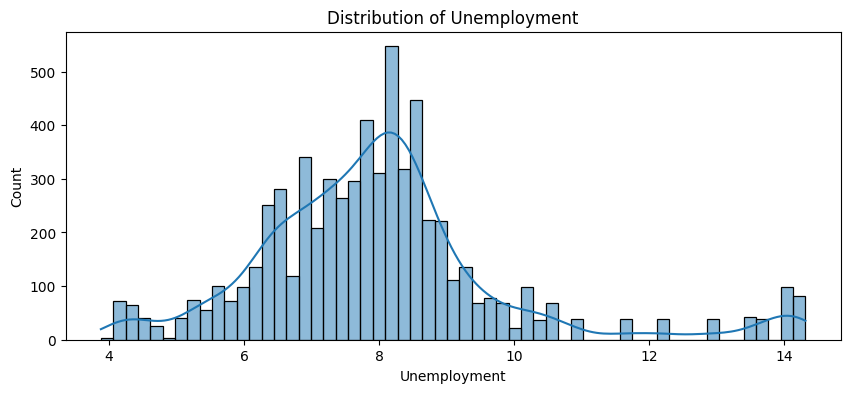

 
Skewness of Unemployment: 1.1881439334843265


In [10]:
# prompt: skewness graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the histograms for each numeric column
for col in numeric_df:
  plt.figure(figsize=(10, 4))
  sns.histplot(numeric_df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

  # Calculate and print the skewness
  skewness = numeric_df[col].skew()
  print(" ")
  print(f"Skewness of {col}: {skewness}")


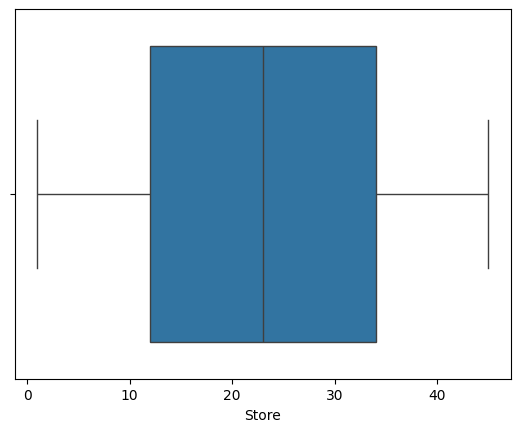

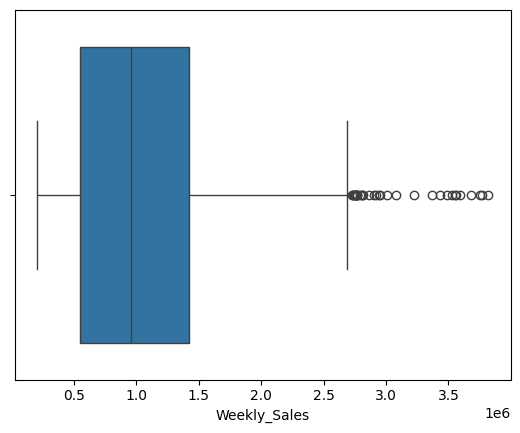

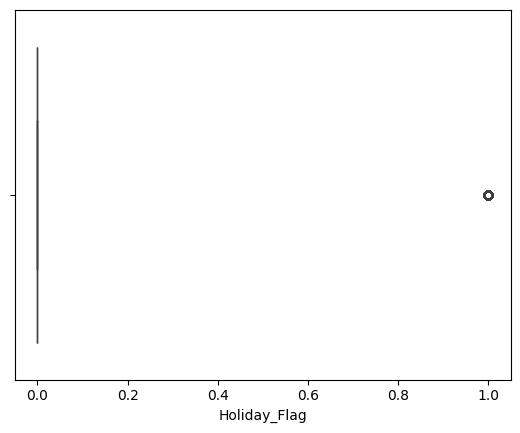

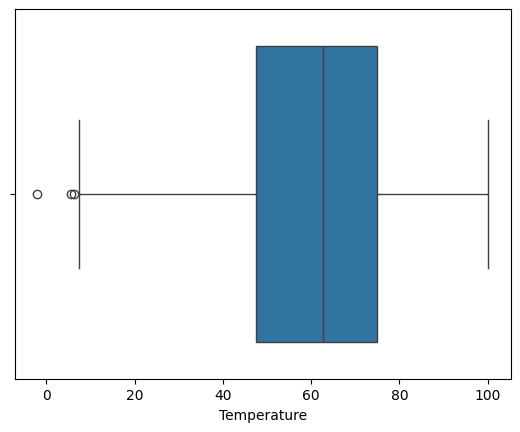

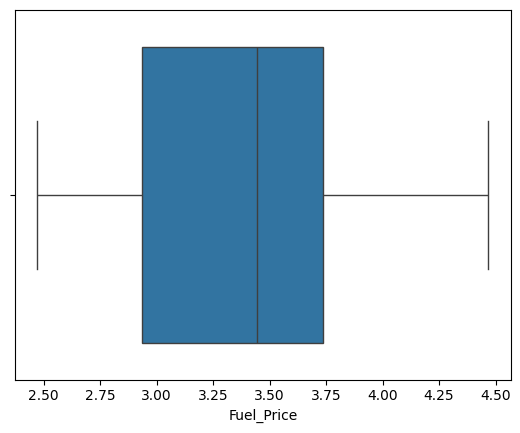

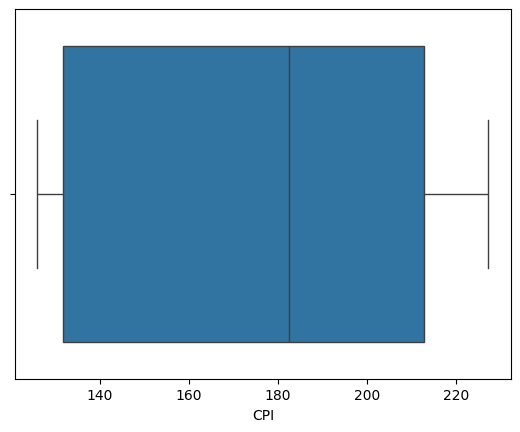

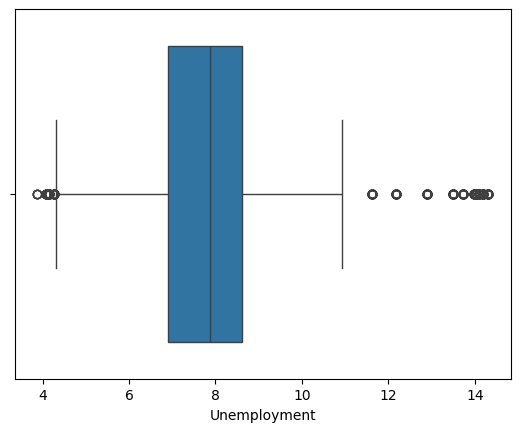

In [11]:
# prompt: Using dataframe df: outliers in df

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each numerical column
for col in df.select_dtypes(include=['number']):
    sns.boxplot(x=df[col])
    plt.show()


<Axes: xlabel='CPI', ylabel='Fuel_Price'>

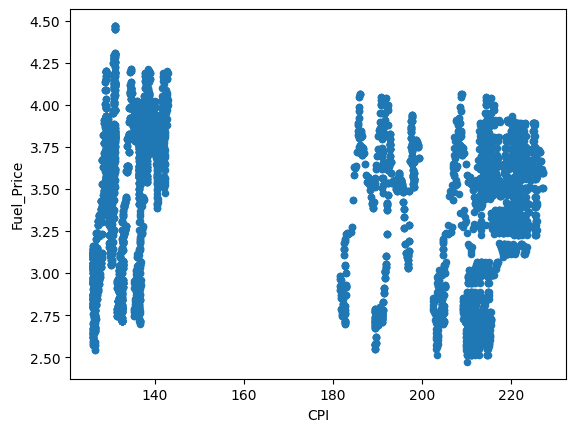

In [12]:
# @title Fuel_Price vs CPI

df.plot.scatter(x='CPI', y='Fuel_Price')

<Axes: xlabel='Date'>

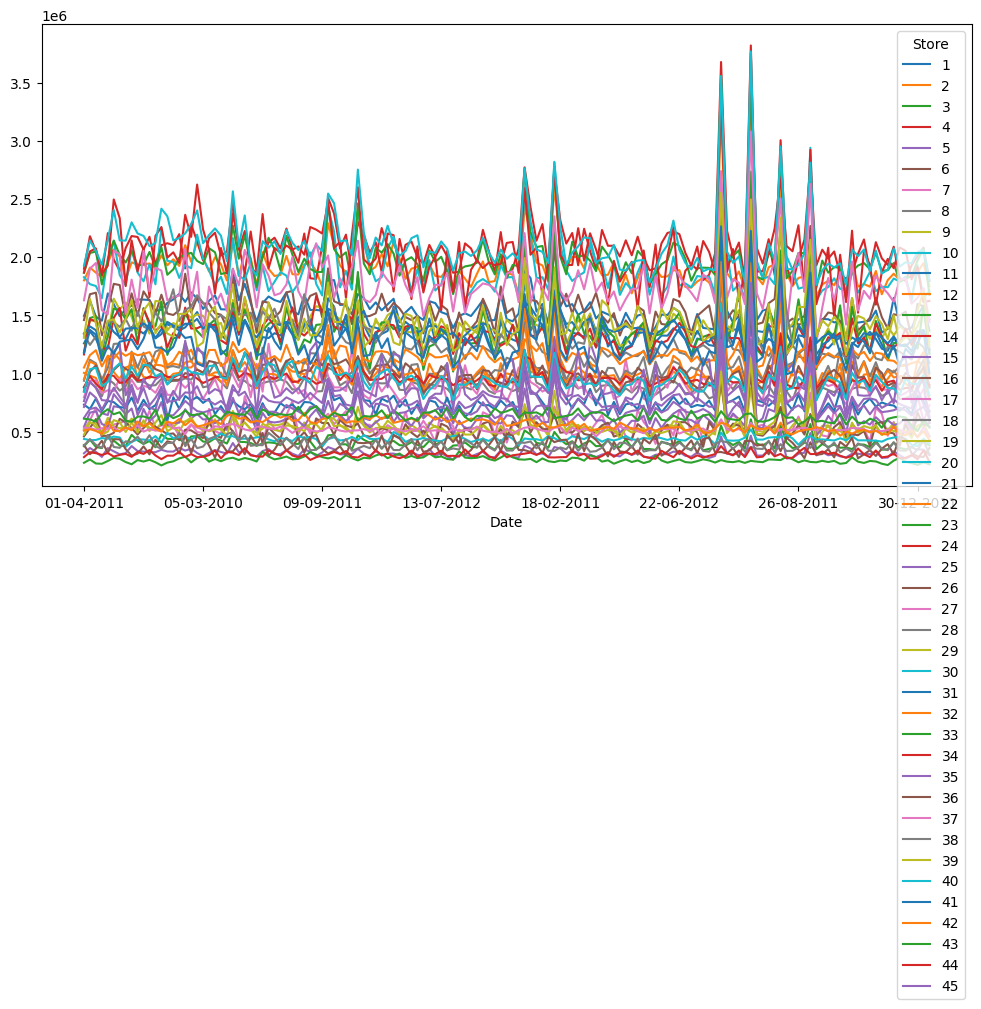

In [13]:
# @title Average Weekly Sales by Store over Time

df.groupby(['Date', 'Store'])['Weekly_Sales'].mean().unstack().plot(figsize=(12, 6))

In [14]:
df_3 = df.groupby('Date')[['CPI']].sum()

fig = px.line(df_3, x=df_3.index, y=df_3['CPI'], title='change CPI per week')
fig.show()

<Axes: xlabel='Date'>

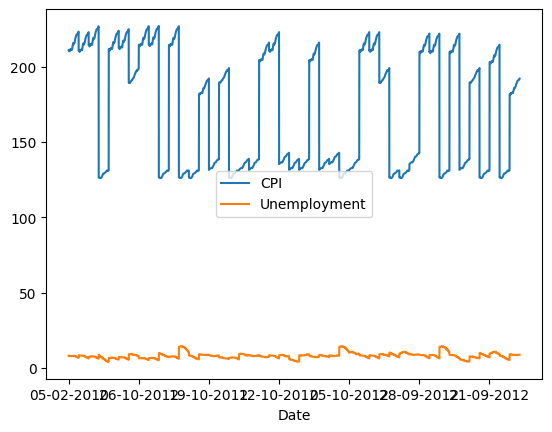

In [15]:
# @title CPI vs Unemployment over Time

df.plot(x='Date', y=['CPI', 'Unemployment'])

In [16]:
# @title Unemployement vs weekly_sales in stores
plt.figure(figsize = (20,5))
fig = px.scatter(df, x="Weekly_Sales", y="Unemployment", color="Store",
                 title="Relation between Unemployment and weeklysales within stores" , color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Date'>

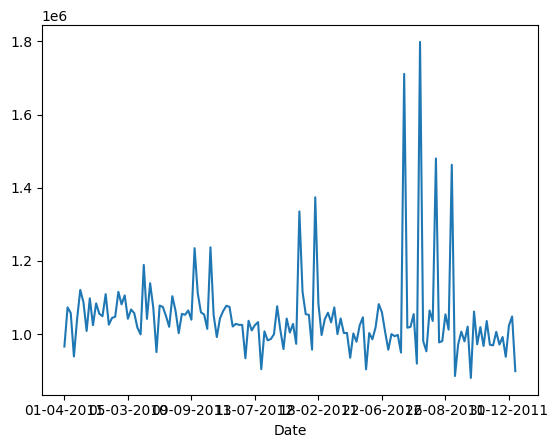

In [17]:
# @title Average Weekly Sales over Time

df.groupby('Date')['Weekly_Sales'].mean().plot()

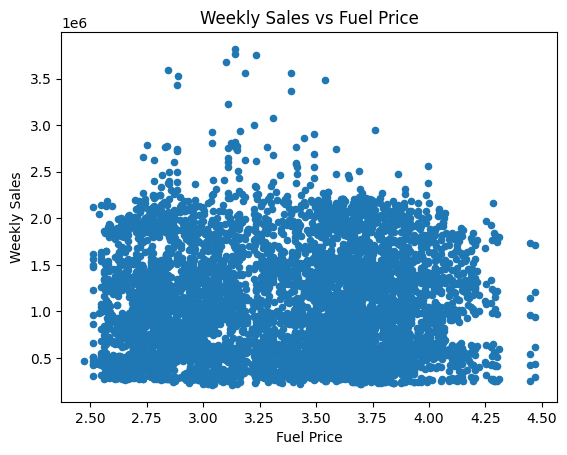

In [18]:
# prompt: weekly_sales vs fuel price graph

import matplotlib.pyplot as plt
df.plot.scatter(x='Fuel_Price', y='Weekly_Sales')
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


In [19]:
# prompt: weekly_sales vs fuel price graph using plotly express

import pandas as pd
import plotly.express as px

df = pd.read_csv("/walmart-sales-dataset-of-45stores.csv")

fig = px.scatter(df, x="Fuel_Price", y="Weekly_Sales", title="Weekly Sales vs Fuel Price")

fig.show()


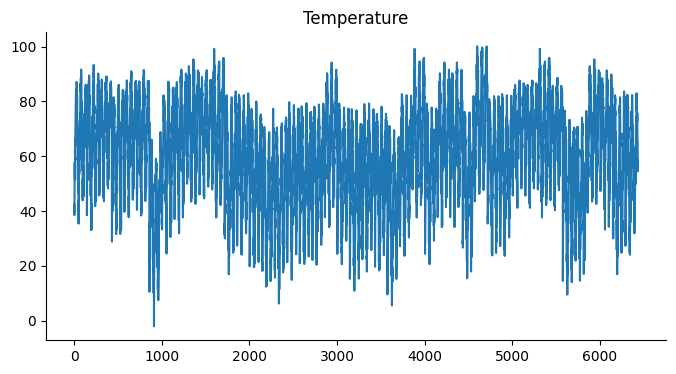

In [20]:
# @title Temperature

from matplotlib import pyplot as plt
df['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
plt.figure(figsize = (20,5))
fig = px.scatter(df, x="Weekly_Sales", y="Temperature", color="Store",
                 title="Relation between Temperature and weeklysales within stores")

fig.show()

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Store'>

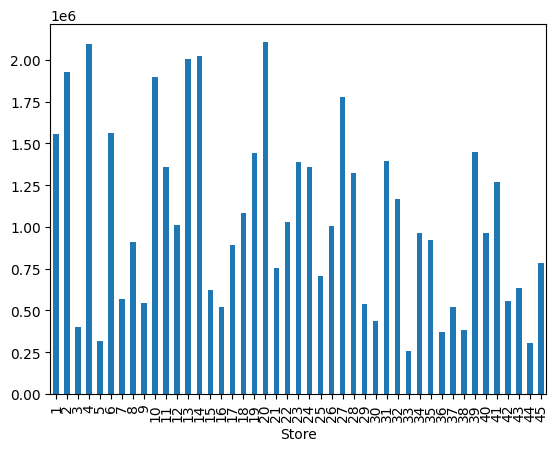

In [22]:
# @title Average Weekly Sales by Store

df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')

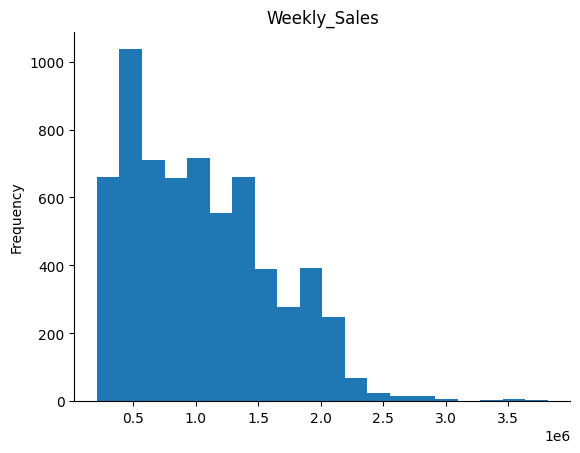

In [23]:
# @title Weekly_Sales

from matplotlib import pyplot as plt
df['Weekly_Sales'].plot(kind='hist', bins=20, title='Weekly_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

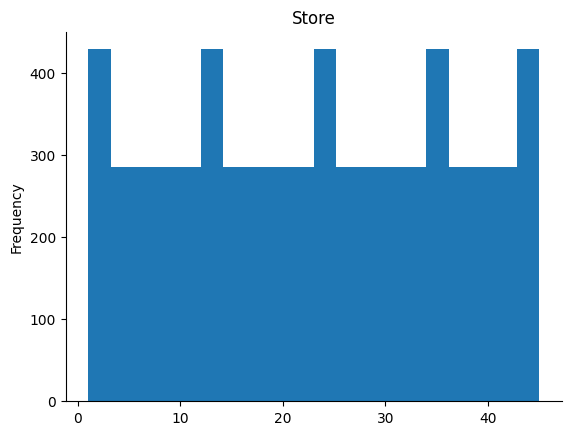

In [24]:
# @title Store

from matplotlib import pyplot as plt
df['Store'].plot(kind='hist', bins=20, title='Store')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
import plotly.express as px
plt.figure(figsize = (20,5))

fig = px.strip(df, x="Weekly_Sales", y="Holiday_Flag", orientation="h", color="Store" , title = 'relation between weekly sales and holiday_flag')
fig.show()

<Figure size 2000x500 with 0 Axes>

**Time Series Analysis and Decomposition**

---



In [26]:
Sales = df.groupby(['Date'])[['Weekly_Sales']].sum()

<Axes: xlabel='Date'>

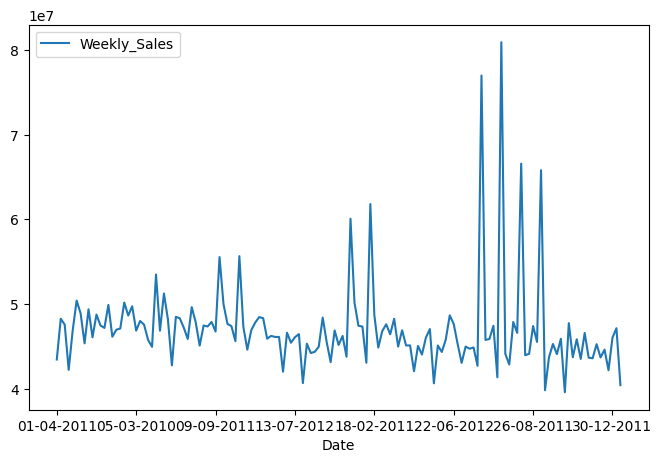

In [27]:
Sales.plot(figsize=(8,5))

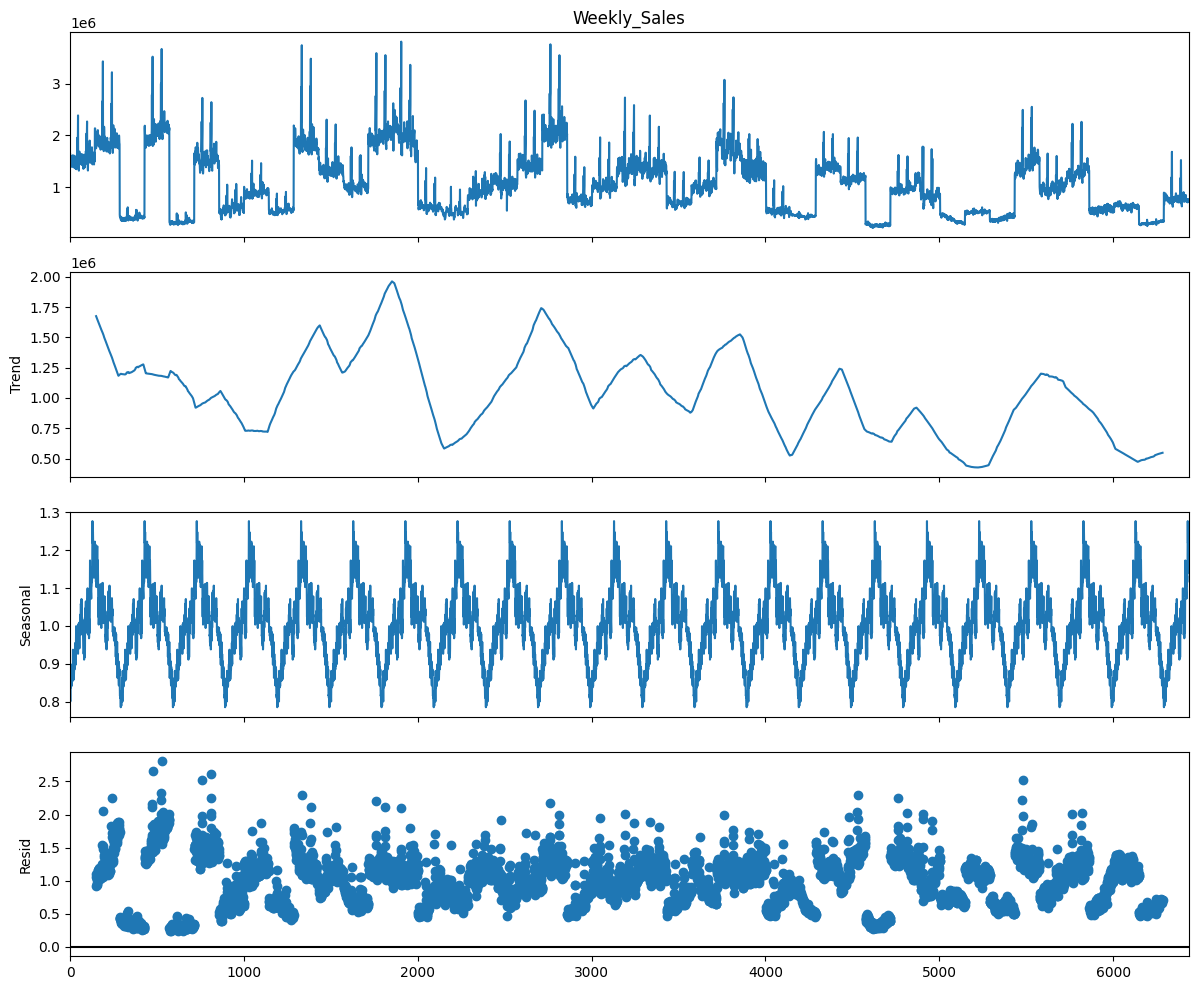

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Weekly_Sales'], model='multiplicative', period=300)


# Plot
plt.rcParams.update({'figure.figsize': (12,10)})
multiplicative_decomposition.plot()
plt.show()

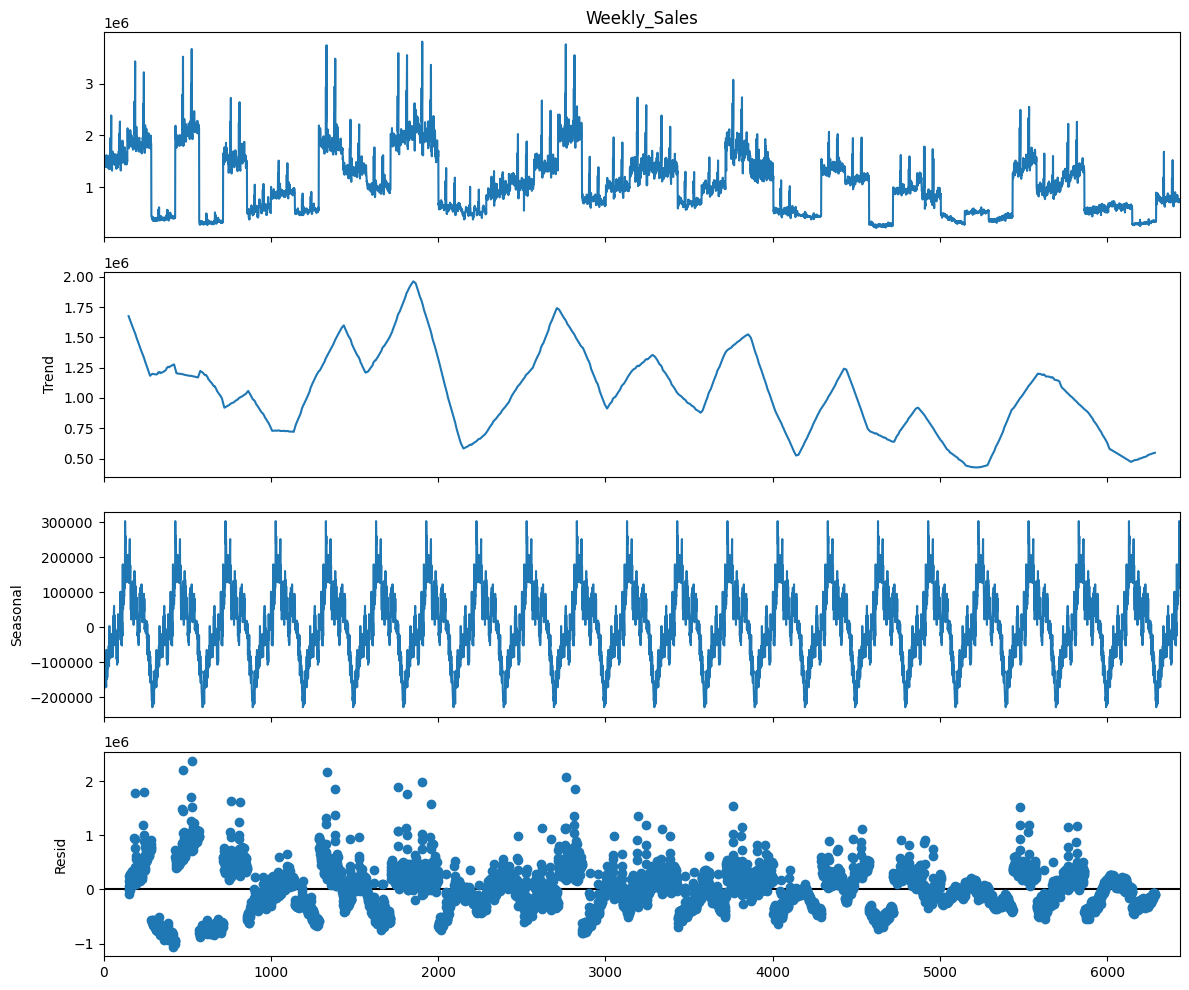

In [29]:
# additive Decomposition
additive_decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=300)


# Plot
plt.rcParams.update({'figure.figsize': (12,10)})
additive_decomposition.plot()
plt.show()

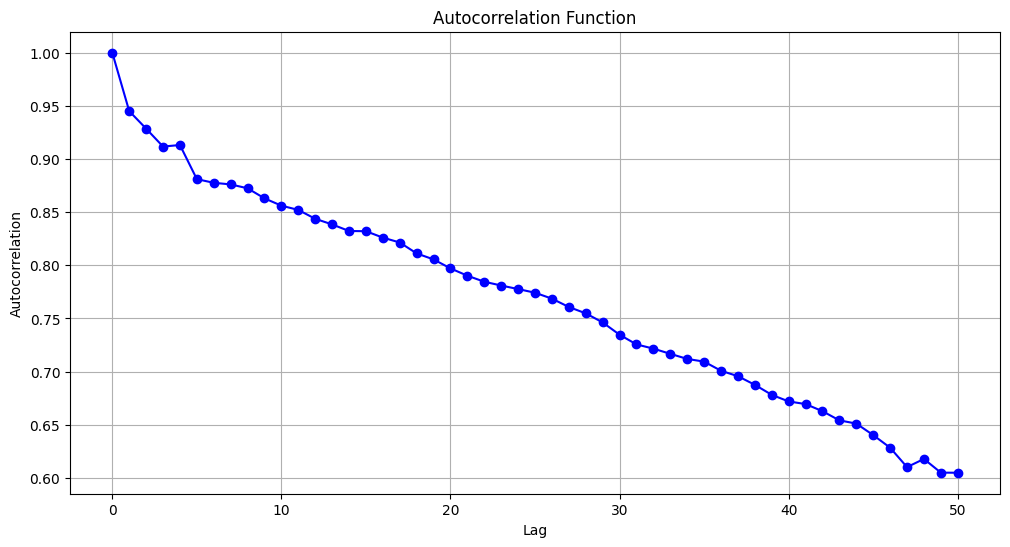

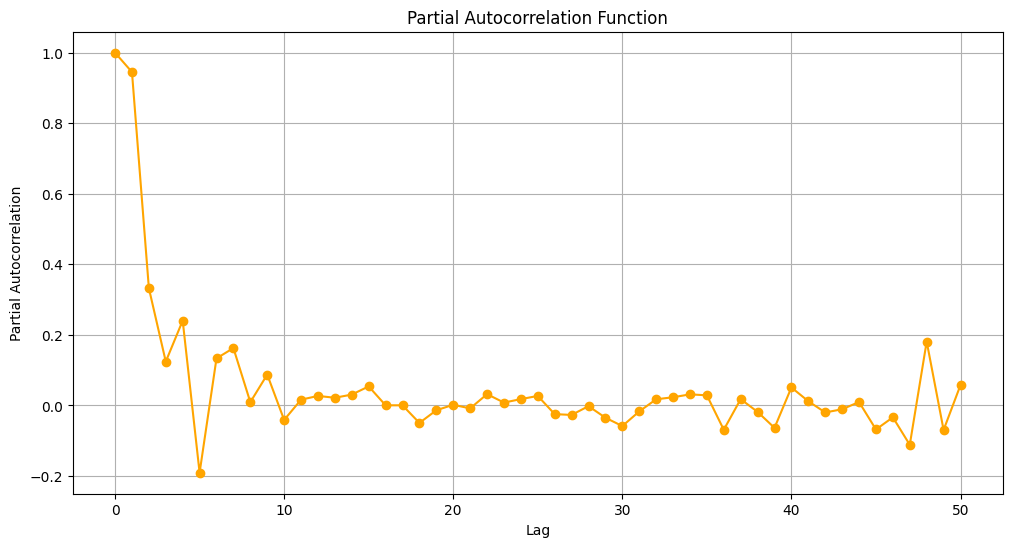

In [30]:
# prompt: time series analysis plotting acf and autocorrelation plots

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Calculate the autocorrelation and partial autocorrelation functions
acf_values = acf(df['Weekly_Sales'], nlags=50)
pacf_values = pacf(df['Weekly_Sales'], nlags=50)

# Plot the autocorrelation function
plt.figure(figsize=(12, 6))
plt.plot(acf_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()

# Plot the partial autocorrelation function
plt.figure(figsize=(12, 6))
plt.plot(pacf_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function')
plt.grid(True)
plt.show()


ADF Statistic: -4.62
p-value: 0.0001


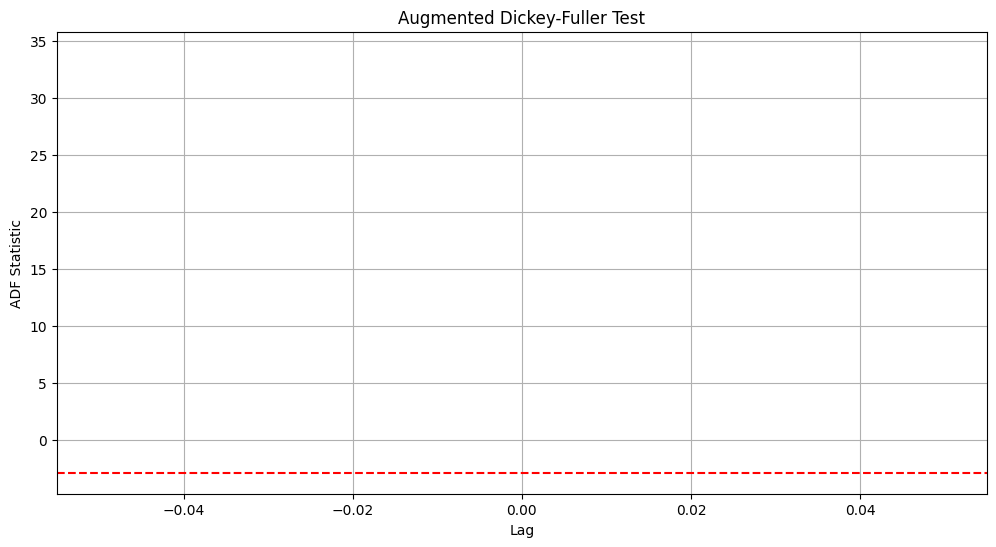

In [31]:
# prompt: plot for stationarity

import matplotlib.pyplot as plt
# Import necessary libraries
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
adf_result = adfuller(df['Weekly_Sales'])
print(f"ADF Statistic: {adf_result[0]:.2f}")
print(f"p-value: {adf_result[1]:.4f}")

# Plot the Augmented Dickey-Fuller Test results
plt.figure(figsize=(12, 6))
plt.plot(adf_result[2], color='blue')
plt.axhline(y=adf_result[4]['5%'], color='red', linestyle='--')
plt.title('Augmented Dickey-Fuller Test')
plt.xlabel('Lag')
plt.ylabel('ADF Statistic')
plt.grid(True)
plt.show()


## **4. TS models**

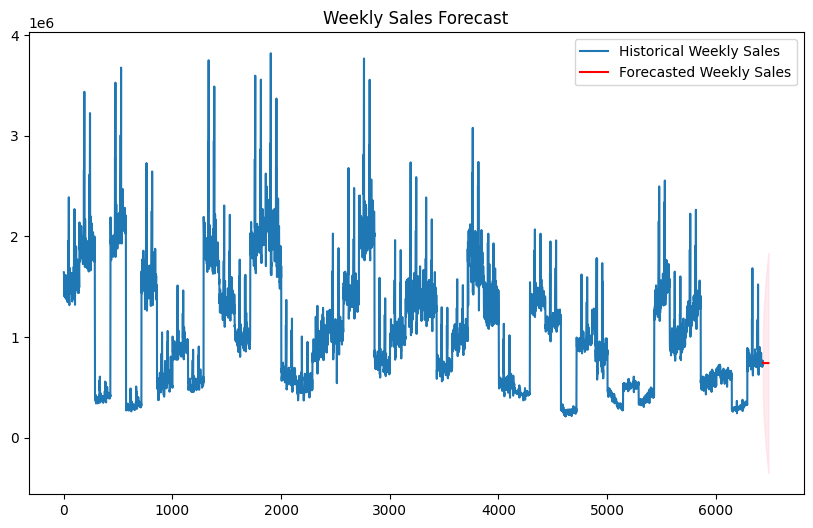

In [35]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
model = ARIMA(df['Weekly_Sales'], order=(1, 1, 1))
result = model.fit()

# Make predictions
forecasts = result.get_forecast(steps=51)  # Predict the next 51 weeks
forecast_mean = forecasts.summary_frame()['mean']

# Plot the historical data and forecasts
plt.figure(figsize=(10, 6))
df['Weekly_Sales'].plot(label='Historical Weekly Sales')
forecast_mean.plot(label='Forecasted Weekly Sales', color='red')
plt.fill_between(forecast_mean.index,
                 forecasts.summary_frame()['mean_ci_lower'],
                 forecasts.summary_frame()['mean_ci_upper'], color='pink', alpha=0.3)
plt.legend()
plt.title('Weekly Sales Forecast')
plt.show()

For our project, we selected an ARIMA(1,1,1) model to forecast weekly sales. This decision was based on several considerations:

1. **Preliminary Data Analysis**: Initial examination showed that while the data displayed some seasonal patterns, it was primarily stationary after differencing. An ARIMA model, which accounts for trends and autocorrelation, seemed suitable.

2. **Model Simplicity**: We adhered to the parsimony principle, which suggests that models with fewer parameters that adequately fit the data are preferable due to lower risk of overfitting.

3. **Computational Resources**: Given the need to fit models for multiple time series across 45 stores and computational constraints, the non-seasonal ARIMA model provided a balance between complexity and computational efficiency.

4. **Diagnostics**: Preliminary residual analysis did not indicate any obvious patterns, suggesting that the ARIMA(1,1,1) model was capturing the major structure of the data.

5. **Transformations**: We did not apply any transformations such as logging or deflating the series since the ARIMA model's differencing term effectively stabilized the mean of the time series.

The plot of the historical and forecasted sales validates our choice, showing that the ARIMA(1,1,1) model is capable of forecasting the general trend of the sales data. While it does not capture the finer fluctuations, it serves as an efficient forecasting tool for multiple stores where detailed seasonal modeling is less feasible.

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

forecasted_values = forecasts.summary_frame()['mean']

# Calculate MSE and RMSE
mse = mean_squared_error(acf_values, forecasted_values)
rmse = sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 548636731905.2797
RMSE: 740700.163295027
